In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## CHARGEMENT DES DONNÉES

In [10]:
df = pd.read_csv('../results_associativity.csv')

df.head()

,op1,op2,repetition,seed,a,b,NombreReussites,NombreEssais,PourcentageReussites
0,(x + y) + z,x + (y + z),10,0,-1,1,10,10,100.0
1,(x + y) + z,x + (y + z),10,0,-1,5,7,10,70.0
2,(x + y) + z,x + (y + z),10,0,-1,10,6,10,60.0
3,(x + y) + z,x + (y + z),10,0,-1,20,7,10,70.0
4,(x + y) + z,x + (y + z),10,0,-1,50,7,10,70.0


## SÉPARATION TRAIN / TEST

In [12]:
X = df[["repetition","a","b"]]
y = df["PourcentageReussites"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



## TRAINING DU DECISION TREE

In [22]:
model = DecisionTreeRegressor(max_depth=3, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE :", mean_squared_error(y_test, y_pred))
print("R2  :", r2_score(y_test, y_pred))


MSE : 21.755807577757846
R2  : 0.4937487859935147


## VISUALISATION DE L'ARBRE

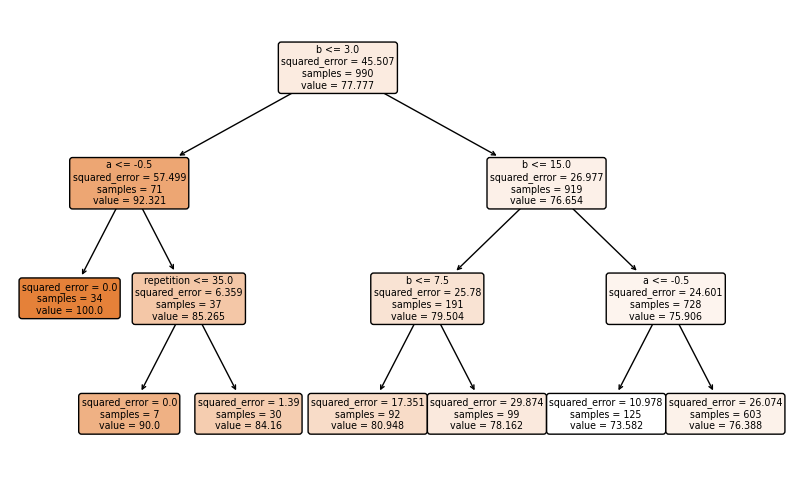

In [14]:
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## RÈGLES TEXTUELLES (interprétables)

In [23]:
rules = export_text(model, feature_names=list(X.columns))
print(rules)

|--- b <= 3.00
|   |--- a <= -0.50
|   |   |--- value: [100.00]
|   |--- a >  -0.50
|   |   |--- repetition <= 35.00
|   |   |   |--- value: [90.00]
|   |   |--- repetition >  35.00
|   |   |   |--- value: [84.16]
|--- b >  3.00
|   |--- b <= 15.00
|   |   |--- b <= 7.50
|   |   |   |--- value: [80.95]
|   |   |--- b >  7.50
|   |   |   |--- value: [78.16]
|   |--- b >  15.00
|   |   |--- a <= -0.50
|   |   |   |--- value: [73.58]
|   |   |--- a >  -0.50
|   |   |   |--- value: [76.39]



On remarque que les valeurs de a et b (les bornes de notre experience) sont les éléments qui ont le plus d'impacts sur les résultats obtenus. Le nombre de répétition semble, dans notre arbre, avoir moins d'impact. Cela peut s'expliquer par le fait que les résultats se stabilisent assez rapidement avec cette experience.